# Importing and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import plotly as py


C:\Users\Pavilion\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
vg = pd.read_csv('vgsales.csv')

In [3]:
vg.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
print('This dataframe contains {} rows and {} columns'.format(vg.shape[0], vg.shape[1]))

This dataframe contains 16598 rows and 11 columns


In [5]:
# Create a Descriptive Dataframe
kolom_desc = ['Feature Name', 'Feature Type', 'Null Count', 'Null Percentage', 'Unique Data', 'Unique Data Sample']
list_desc = []
for i in vg.columns:
    list_desc.append([i,
                      vg[i].dtype,
                      vg[i].isna().sum(),
                      round((vg[i].isna().sum()/len(vg[i]))*100,2),
                      vg[i].nunique(),
                      list(vg[i].drop_duplicates().sample(2, replace = True).values)
                     ])
df_desc = pd.DataFrame(columns = kolom_desc, data = list_desc)
df_desc

,Feature Name,Feature Type,Null Count,Null Percentage,Unique Data,Unique Data Sample
0,Rank,int64,0,0.00,16598,"[10894, 13343]"
1,Name,object,0,0.00,11493,"[Dynasty Warriors Gundam, Maji de Manabu: LEC ..."
2,Platform,object,0,0.00,31,"[GB, NG]"
3,Year,float64,271,1.63,39,"[2014.0, 2003.0]"
4,Genre,object,0,0.00,12,"[Adventure, Shooter]"
5,Publisher,object,58,0.35,578,"[Fortyfive, ESP]"
6,NA_Sales,float64,0,0.00,409,"[1.06, 1.2]"
7,EU_Sales,float64,0,0.00,305,"[1.2, 0.21]"
8,JP_Sales,float64,0,0.00,244,"[0.49, 1.7]"
9,Other_Sales,float64,0,0.00,157,"[8.46, 1.09]"


In this dataset, there are 11 columns which consist of : <br>
  * <b>Rank</b>        : The ranking of the games determined by global sales (integer)
  * <b>Name</b>        : The title of the game (object)
  * <b>Platform</b>    : The console of platform in which the games is released (object)
  * <b>Year</b>        : The year of the game release (float)
  * <b>Genre</b>       : The genre of the game (object)
  * <b>Publisher</b>   : The company responsible for the game to publish (object)
  * <b>NA_Sales</b>    : The games' sales in Northern America region (float)
  * <b>EU_Sales</b>    : The games' sales in European region (float)
  * <b>JP_Sales</b>    : The games' sales in Japan region (float)
  * <b>Other_Sales</b> : The games' sales in other region beside three regions above (float)
  * <b>Global_Sales</b>: The games' overall sales (float)

In [6]:
#Tidying up odd data
vg.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
vg[vg['Year'] == 2020]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [8]:
vg['Year'].replace(to_replace=2020, value=2009,inplace=True)

In [9]:
#Removing Duplicate Data
vg = vg.drop_duplicates(keep = 'first')

In [10]:
vg = vg.dropna()

In [11]:
vg.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
vg['Year'] = vg['Year'].astype('int64')

# 1 Best Selling Platform

In [13]:
# Creating function to show value on each bar
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

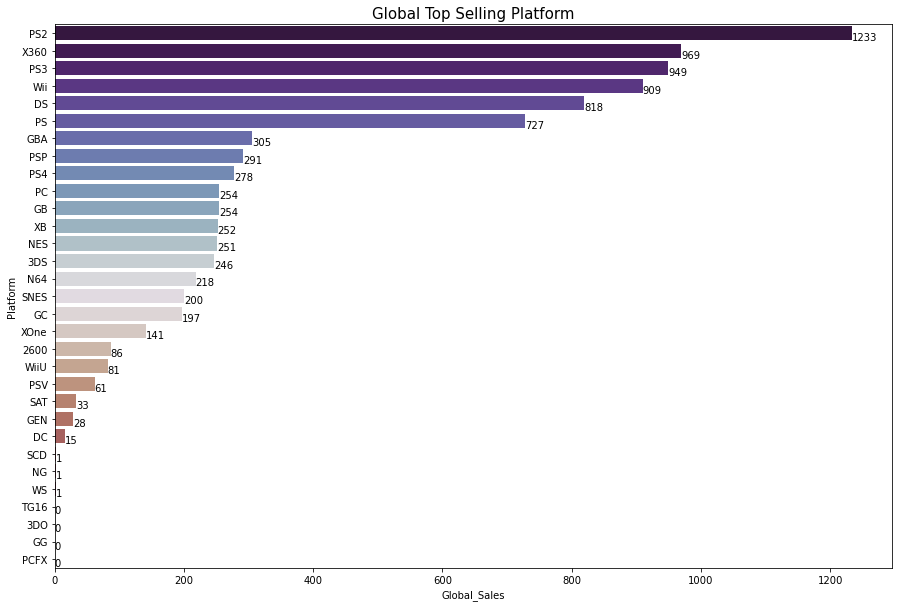

In [14]:
popular_platform = vg.groupby(by = ['Platform'])['Global_Sales'].sum()
popular_platform = popular_platform.reset_index().sort_values(by = 'Global_Sales', ascending = False)

plt.figure(figsize = (15,10))
plat_fig = sns.barplot(x = 'Global_Sales', y = 'Platform', data = popular_platform, palette = 'twilight_shifted')
plat_fig.set_title('Global Top Selling Platform', fontsize = 15)

show_values_on_bars(plat_fig, 'h', 0)

plt.show()

> It seems that PS2 is the best selling platform.

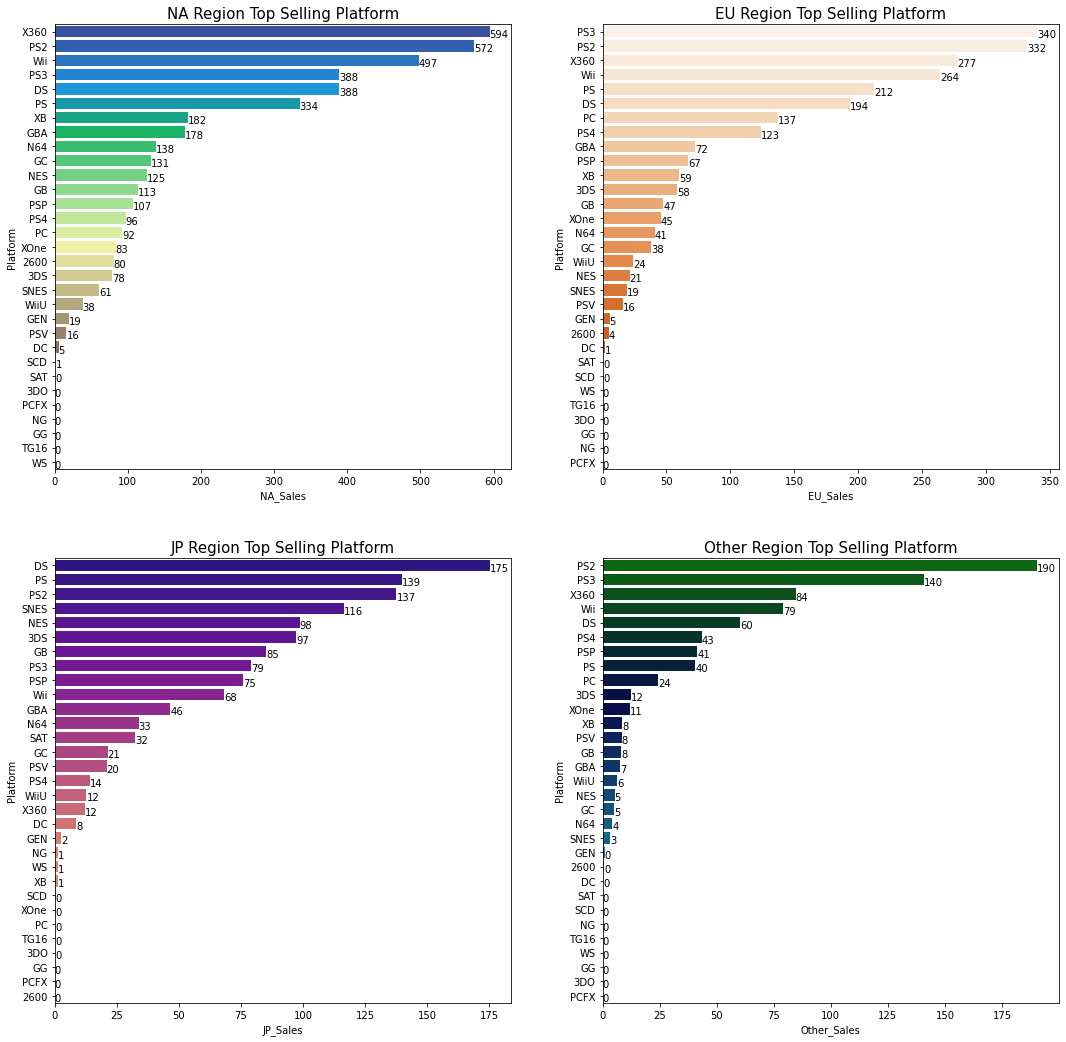

In [15]:
na_platform = vg.groupby(by = ['Platform'])['NA_Sales'].sum()
na_platform = na_platform.reset_index().sort_values(by = 'NA_Sales', ascending = False)

eu_platform = vg.groupby(by = ['Platform'])['EU_Sales'].sum()
eu_platform = eu_platform.reset_index().sort_values(by = 'EU_Sales', ascending = False)

jp_platform = vg.groupby(by = ['Platform'])['JP_Sales'].sum()
jp_platform = jp_platform.reset_index().sort_values(by = 'JP_Sales', ascending = False)

other_platform = vg.groupby(by = ['Platform'])['Other_Sales'].sum()
other_platform = other_platform.reset_index().sort_values(by = 'Other_Sales', ascending = False)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18,18))

na_plat_fig = sns.barplot(x = 'NA_Sales', y = 'Platform', data = na_platform, palette = 'terrain', ax = ax1)
na_plat_fig.set_title('NA Region Top Selling Platform', fontsize = 15)
show_values_on_bars(na_plat_fig, 'h', 0)

eu_plat_fig = sns.barplot(x = 'EU_Sales', y = 'Platform', data = eu_platform, palette = 'Oranges', ax = ax2)
eu_plat_fig.set_title('EU Region Top Selling Platform', fontsize = 15)
show_values_on_bars(eu_plat_fig, 'h', 0)

jp_plat_fig = sns.barplot(x = 'JP_Sales', y = 'Platform', data = jp_platform, palette = 'plasma', ax = ax3)
jp_plat_fig.set_title('JP Region Top Selling Platform', fontsize = 15)
show_values_on_bars(jp_plat_fig, 'h', 0)

ot_plat_fig = sns.barplot(x = 'Other_Sales', y = 'Platform', data = other_platform, palette = 'ocean', ax = ax4)
ot_plat_fig.set_title('Other Region Top Selling Platform', fontsize = 15)
show_values_on_bars(ot_plat_fig, 'h', 0)

plt.show()

> It seems that each region has their own unique best selling platform, but PS2 is on the top 2 best selling platform on all regions.

# 2 Popular Platform

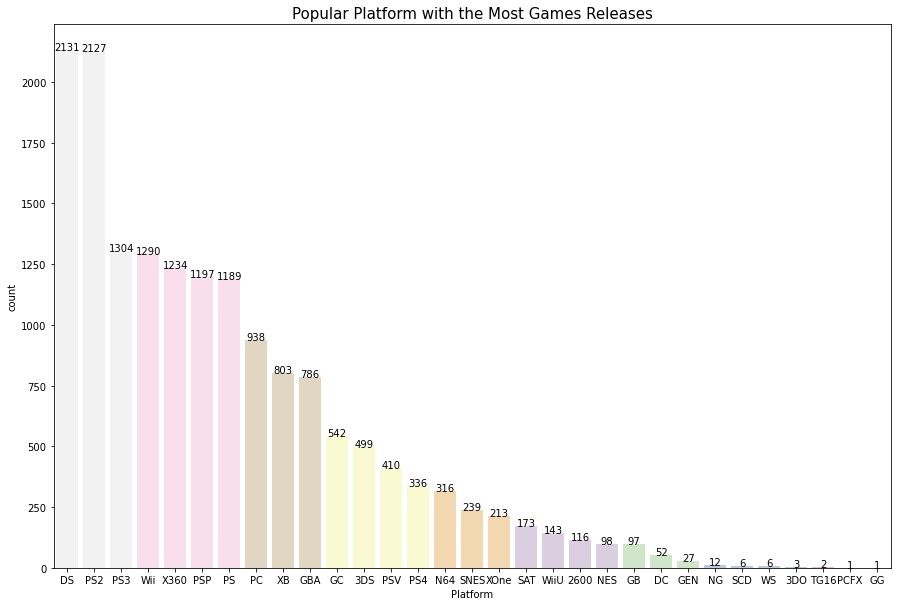

In [16]:
plt.figure(figsize = (15,10))

game_rls = sns.countplot(x = vg['Platform'], order = vg['Platform'].value_counts().index, palette = 'Pastel1_r')
game_rls.set_title('Popular Platform with the Most Games Releases', fontsize = 15)

show_values_on_bars(game_rls, 'v', 0.4)

plt.show()

DS and PS2 are the platforms with most games whose sales greater than 100.000 copies.

# 3 Global Sales Annual Growth

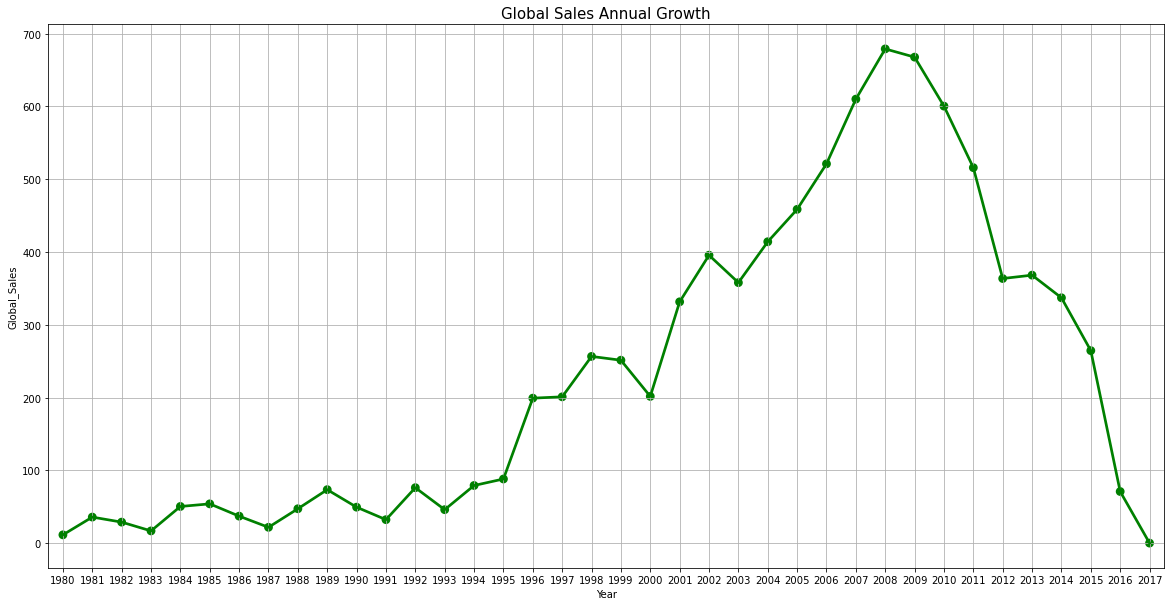

In [17]:
plt.figure(figsize = (20,10))
yearly_sales = vg.groupby(by = ['Year'])['Global_Sales'].sum().reset_index()

gs_yr = sns.pointplot(x = 'Year',y = 'Global_Sales', data = yearly_sales,color='green')
gs_yr.set_title('Global Sales Annual Growth', fontsize = 15)


plt.grid()
plt.show()

> The global sales of these video games didn't really see much growth during 1980 - 1995. But from 1995 onwards, the global sales spikes and reached its peak in 2008. The highest selling games in 2008 is Mario Kart Wii.

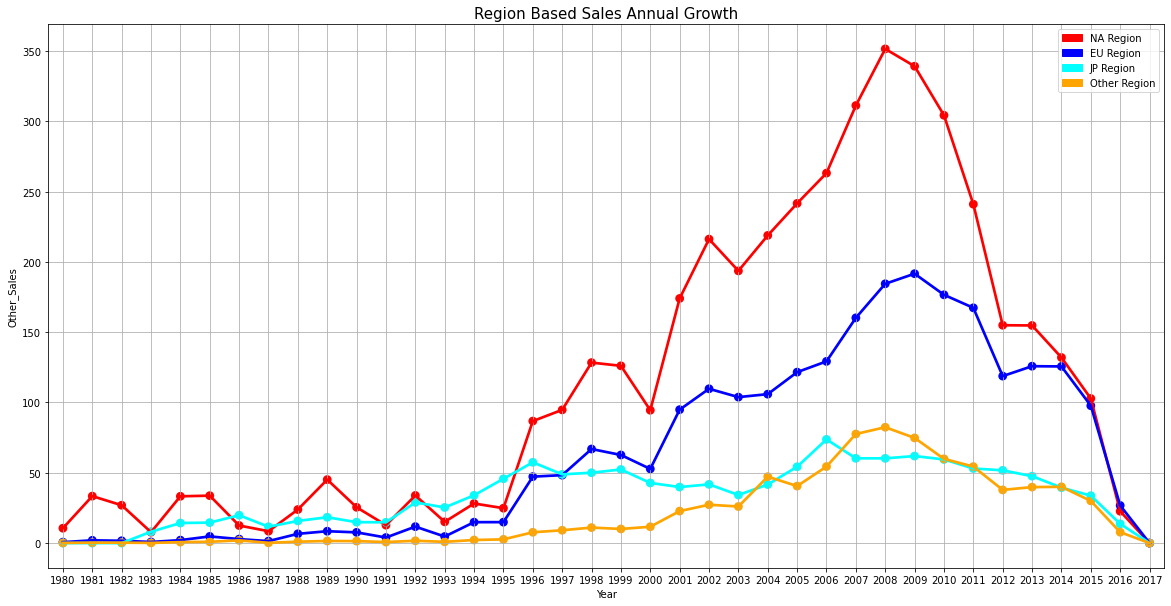

In [18]:
na_yr_sales = vg.groupby(by = ['Year'])['NA_Sales'].sum().reset_index()
eu_yr_sales = vg.groupby(by = ['Year'])['EU_Sales'].sum().reset_index()
jp_yr_sales = vg.groupby(by = ['Year'])['JP_Sales'].sum().reset_index()
ot_yr_sales = vg.groupby(by = ['Year'])['Other_Sales'].sum().reset_index()


plt.figure(figsize = (20,10))

na_yr = sns.pointplot(x = 'Year',y = 'NA_Sales', data = na_yr_sales,color='red')
eu_yr = sns.pointplot(x = 'Year',y = 'EU_Sales', data = eu_yr_sales,color='blue')
jp_yr = sns.pointplot(x = 'Year',y = 'JP_Sales', data = jp_yr_sales,color='cyan')
ot_yr = sns.pointplot(x = 'Year',y = 'Other_Sales', data = ot_yr_sales,color='orange')


red_yr = mpatches.Patch(color='red', label='NA Region')
blue_yr = mpatches.Patch(color='blue', label='EU Region')
cyan_yr = mpatches.Patch(color='cyan', label='JP Region')
orange_yr = mpatches.Patch(color='orange', label='Other Region')

plt.legend(handles=[red_yr, blue_yr, cyan_yr, orange_yr])
plt.title('Region Based Sales Annual Growth', fontsize = 15)

plt.grid()
plt.show()

> The highest selling games region is on NA-Region

In [19]:
# global_sales = []
# na_sales = []
# eu_sales = []
# jp_sales = []
# other_sales = []
# year_list = list(vg['Year'].unique())

# for i in year_list:
#     x = vg[vg['Year']==i]
#     global_sales.append(sum(x['Global_Sales'])/len(x))
#     na_sales.append(sum(x['NA_Sales'])/len(x))
#     eu_sales.append(sum(x['EU_Sales']) / len(x))
#     jp_sales.append(sum(x['JP_Sales']) / len(x))
#     other_sales.append(sum(x['Other_Sales']) / len(x))
    

# # visualization
# f,ax = plt.subplots(figsize = (20,10))

# sns.barplot(x = year_list, y = global_sales, color = 'green', alpha = 1, label = 'Global Sales')
# sns.barplot(x = year_list, y = na_sales, color = 'red', alpha = 0.8, label = 'NA Sales')
# sns.barplot(x = year_list, y = eu_sales, color = 'blue', alpha = 0.5, label = 'EU Sales')
# sns.barplot(x = year_list, y = jp_sales, color = 'cyan', alpha = 0.5, label = 'JP Sales')
# sns.barplot(x = year_list, y = other_sales, color = 'orange', alpha = 0.5, label = 'Other Sales')

# # sns.barplot(x=na_sales,y=year_list,color='green',alpha = 0.5,label='White' )
# # sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
# # sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
# # sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
 

# 4 Game Releases Annual Growth

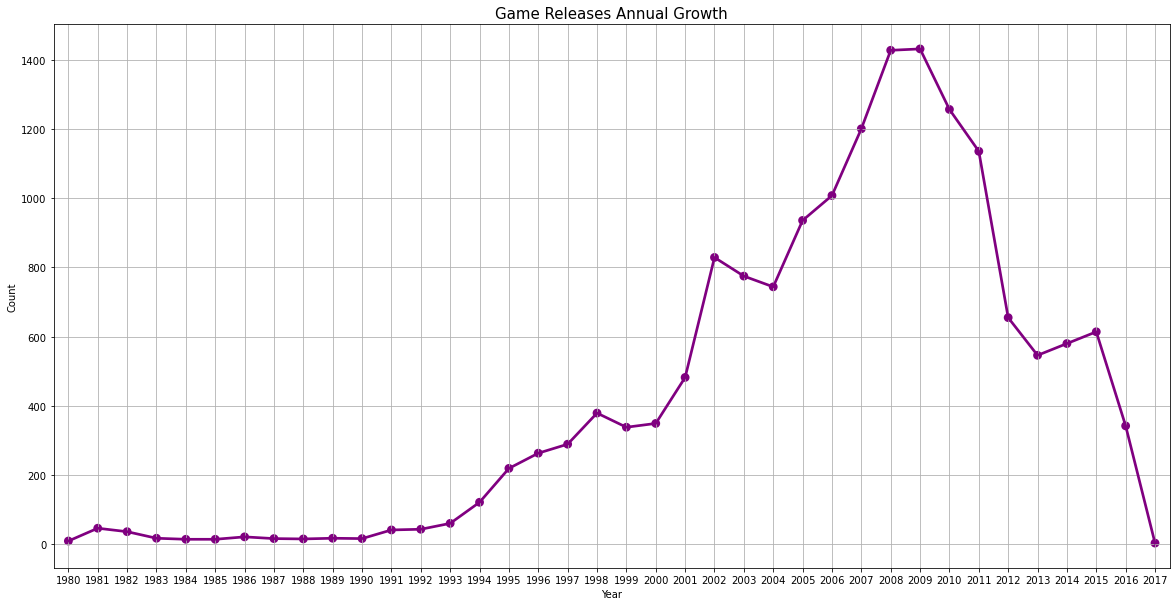

In [20]:
yr_gm = vg['Year'].value_counts().reset_index().sort_values(by = 'index')
yr_gm.rename(columns = {'index' : 'Year', 'Year':'Count'}, inplace = True)

plt.figure(figsize = (20,10))
yr_gm_fig = sns.pointplot(x = 'Year', y = 'Count', data = yr_gm, color = 'purple')
yr_gm_fig.set_title('Game Releases Annual Growth', fontsize = 15)

plt.grid()
plt.show()

> This chart is remarkably similar with the annual global sales growth. As expected, in 2008-2009 are the years with the games were most released.

# 5 Best Selling Genre

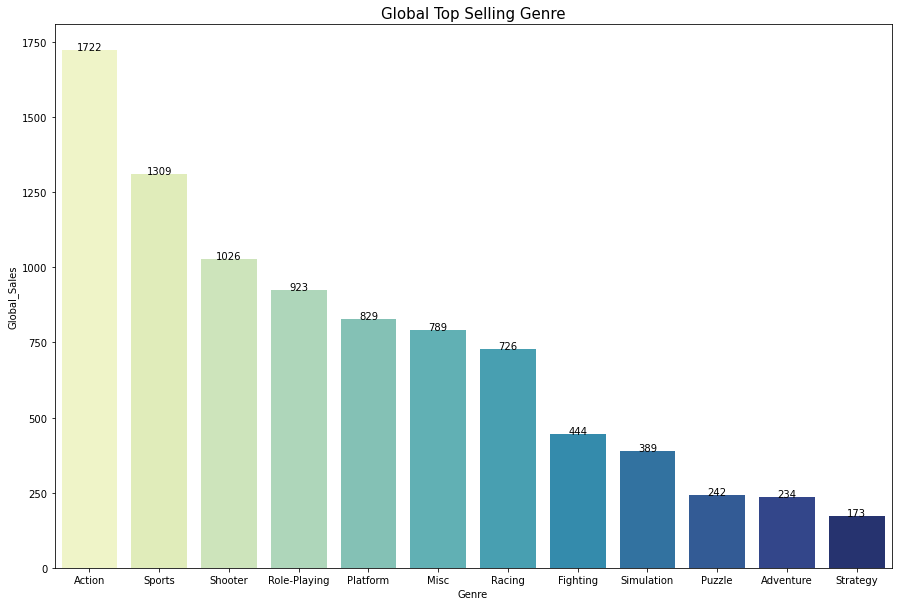

In [21]:
best_genre = vg.groupby(by = ['Genre'])['Global_Sales'].sum()
best_genre = best_genre.reset_index().sort_values(by = 'Global_Sales', ascending = False)

plt.figure(figsize = (15,10))
best_gr_fig = sns.barplot(x = 'Genre', y = 'Global_Sales', data = best_genre, palette = 'YlGnBu')
best_gr_fig.set_title('Global Top Selling Genre', fontsize = 15)

show_values_on_bars(best_gr_fig, 'v', 0)

plt.show()

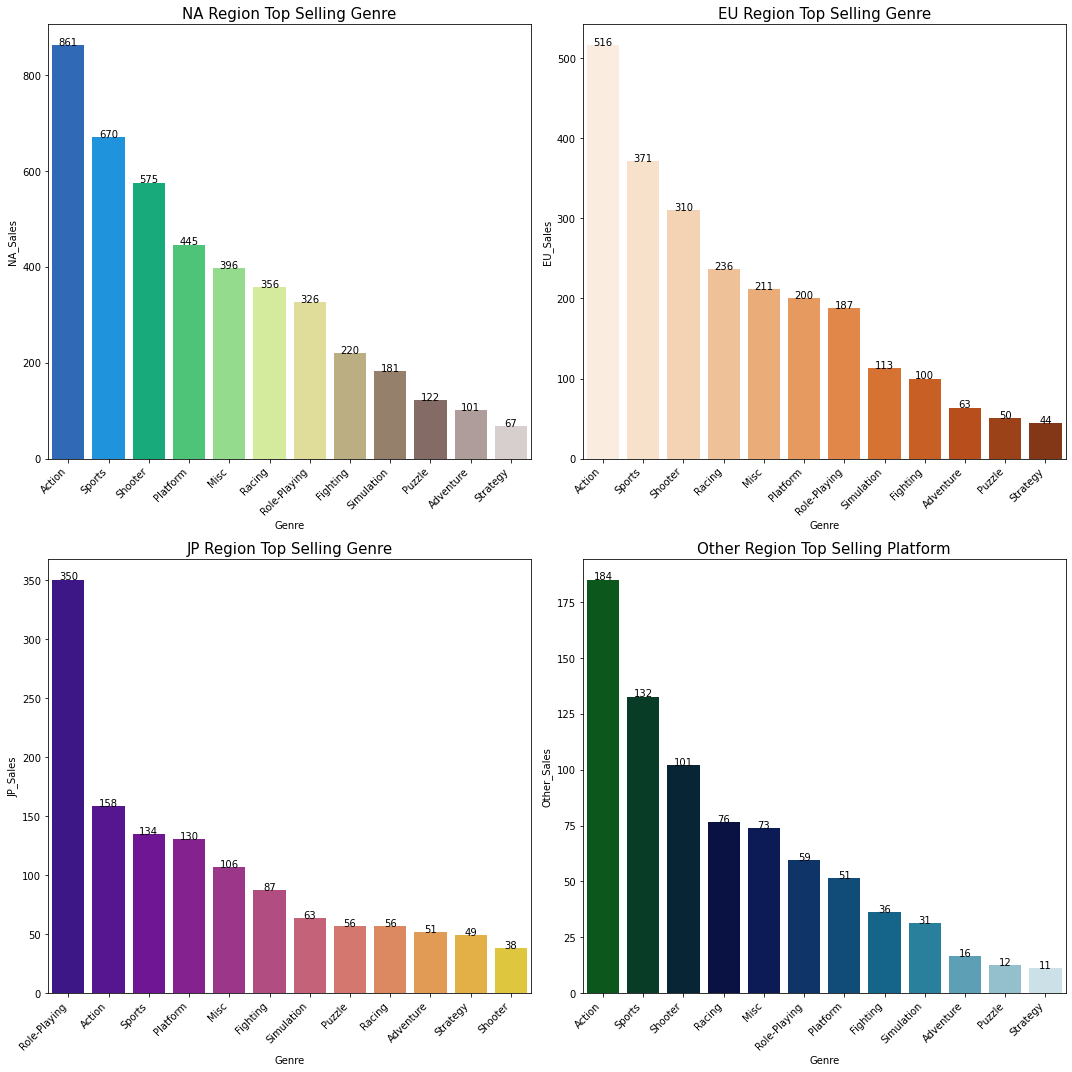

In [22]:
na_genre = vg.groupby(by = ['Genre'])['NA_Sales'].sum()
na_genre = na_genre.reset_index().sort_values(by = 'NA_Sales', ascending = False)

eu_genre = vg.groupby(by = ['Genre'])['EU_Sales'].sum()
eu_genre = eu_genre.reset_index().sort_values(by = 'EU_Sales', ascending = False)

jp_genre = vg.groupby(by = ['Genre'])['JP_Sales'].sum()
jp_genre = jp_genre.reset_index().sort_values(by = 'JP_Sales', ascending = False)

other_genre = vg.groupby(by = ['Genre'])['Other_Sales'].sum()
other_genre = other_genre.reset_index().sort_values(by = 'Other_Sales', ascending = False)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

na_genre_fig = sns.barplot(x = 'Genre', y = 'NA_Sales', data = na_genre, palette = 'terrain', ax = ax1)
na_genre_fig.set_xticklabels(na_genre_fig.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
na_genre_fig.set_title('NA Region Top Selling Genre', fontsize = 15)
show_values_on_bars(na_genre_fig, 'v', 0)

eu_genre_fig = sns.barplot(x = 'Genre', y = 'EU_Sales', data = eu_genre, palette = 'Oranges', ax = ax2)
eu_genre_fig.set_xticklabels(eu_genre_fig.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
eu_genre_fig.set_title('EU Region Top Selling Genre', fontsize = 15)
show_values_on_bars(eu_genre_fig, 'v', 0)

jp_genre_fig = sns.barplot(x = 'Genre', y = 'JP_Sales', data = jp_genre, palette = 'plasma', ax = ax3)
jp_genre_fig.set_xticklabels(jp_genre_fig.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
jp_genre_fig.set_title('JP Region Top Selling Genre', fontsize = 15)
show_values_on_bars(jp_genre_fig, 'v', 0)

ot_genre_fig = sns.barplot(x = 'Genre', y = 'Other_Sales', data = other_genre, palette = 'ocean', ax = ax4)
ot_genre_fig.set_xticklabels(ot_genre_fig.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
ot_genre_fig.set_title('Other Region Top Selling Platform', fontsize = 15)
show_values_on_bars(ot_genre_fig, 'v', 0)


plt.tight_layout()
plt.show()

> Majority of the world mostly likes, Action and Sports genre, except Japan. They like Role-Playing genre the most.

# 6 Popular Genre

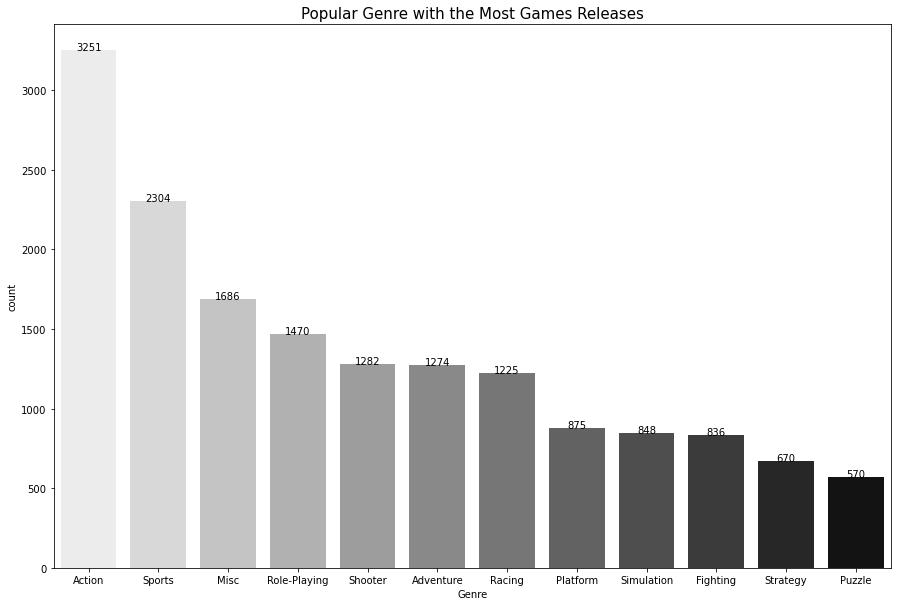

In [23]:
plt.figure(figsize = (15,10))

pop_genre = sns.countplot(x = vg['Genre'], order = vg['Genre'].value_counts().index, palette = 'gray_r')
pop_genre.set_title('Popular Genre with the Most Games Releases', fontsize = 15)

show_values_on_bars(pop_genre, 'v', 0.4)

plt.show()

> I guess it makes sense that the highest selling genre represent equally the most popular one.

# 7 Best Selling Publisher

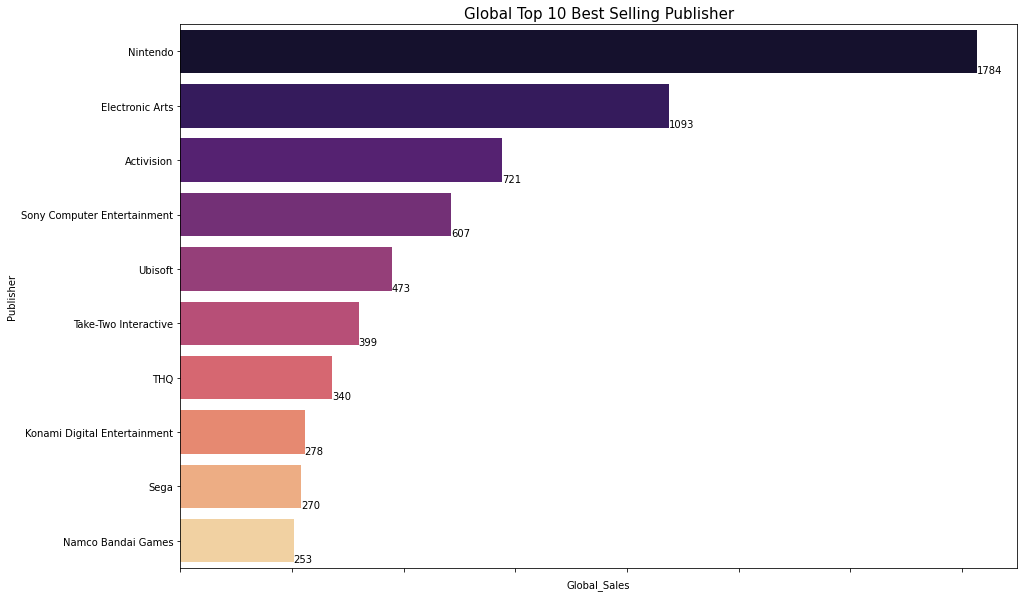

In [24]:
best_publisher = vg.groupby(by = ['Publisher'])['Global_Sales'].sum()
best_publisher = best_publisher.reset_index().sort_values(by = 'Global_Sales', ascending = False).head(10)

plt.figure(figsize = (15,10))
best_publ_fig = sns.barplot(x = 'Global_Sales', y = 'Publisher', data = best_publisher, palette = 'magma')
best_publ_fig.set_xticklabels(best_publ_fig.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
best_publ_fig.set_title('Global Top 10 Best Selling Publisher', fontsize = 15)

show_values_on_bars(best_publ_fig, 'h', 0)

plt.show()

> The top best selling publisher in this dataframe is Nintendo.

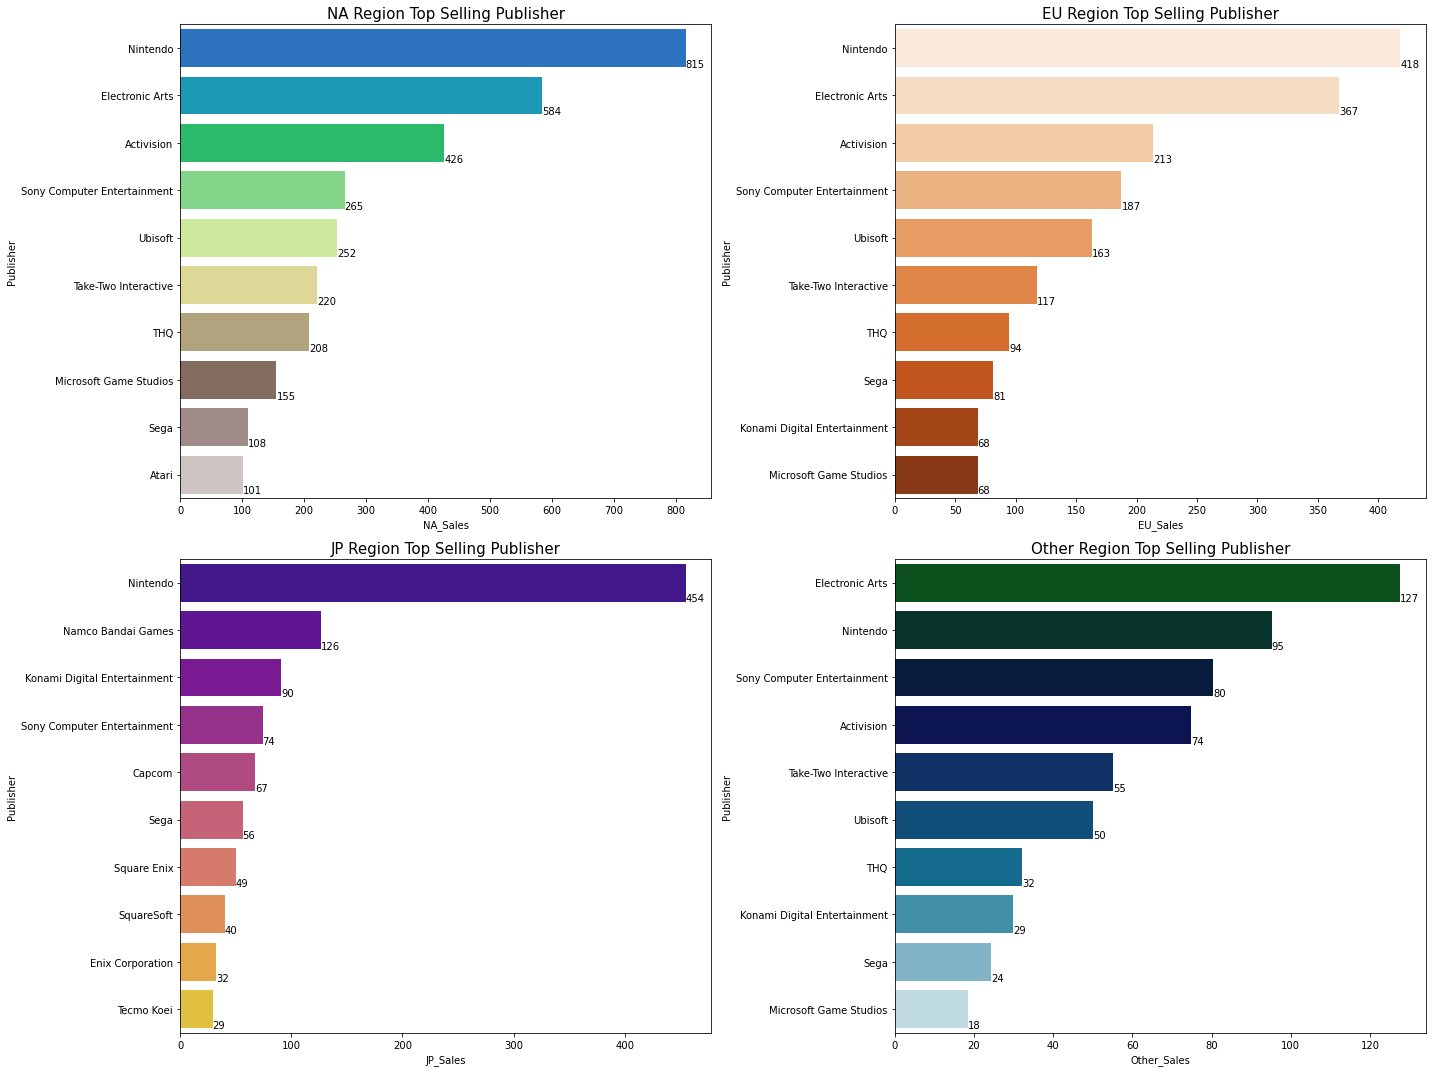

In [25]:
na_publisher = vg.groupby(by = ['Publisher'])['NA_Sales'].sum()
na_publisher = na_publisher.reset_index().sort_values(by = 'NA_Sales', ascending = False).head(10)

eu_publisher = vg.groupby(by = ['Publisher'])['EU_Sales'].sum()
eu_publisher = eu_publisher.reset_index().sort_values(by = 'EU_Sales', ascending = False).head(10)

jp_publisher = vg.groupby(by = ['Publisher'])['JP_Sales'].sum()
jp_publisher = jp_publisher.reset_index().sort_values(by = 'JP_Sales', ascending = False).head(10)

other_publisher = vg.groupby(by = ['Publisher'])['Other_Sales'].sum()
other_publisher = other_publisher.reset_index().sort_values(by = 'Other_Sales', ascending = False).head(10)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))

na_publish_fig = sns.barplot(x = 'NA_Sales', y = 'Publisher', data = na_publisher, palette = 'terrain', ax = ax1)
na_publish_fig.set_title('NA Region Top Selling Publisher', fontsize = 15)
show_values_on_bars(na_publish_fig, 'h', 0)

eu_publish_fig = sns.barplot(x = 'EU_Sales', y = 'Publisher', data = eu_publisher, palette = 'Oranges', ax = ax2)
eu_publish_fig.set_title('EU Region Top Selling Publisher', fontsize = 15)
show_values_on_bars(eu_publish_fig, 'h', 0)

jp_publish_fig = sns.barplot(x = 'JP_Sales', y = 'Publisher', data = jp_publisher, palette = 'plasma', ax = ax3)
jp_publish_fig.set_title('JP Region Top Selling Publisher', fontsize = 15)
show_values_on_bars(jp_publish_fig, 'h', 0)

ot_publish_fig = sns.barplot(x = 'Other_Sales', y = 'Publisher', data = other_publisher, palette = 'ocean', ax = ax4)
ot_publish_fig.set_title('Other Region Top Selling Publisher', fontsize = 15)
show_values_on_bars(ot_publish_fig, 'h', 0)

plt.tight_layout()
plt.show()

> It appears to be that Nintendo had sold well in majority region of the world.

# 8 Popular Publisher

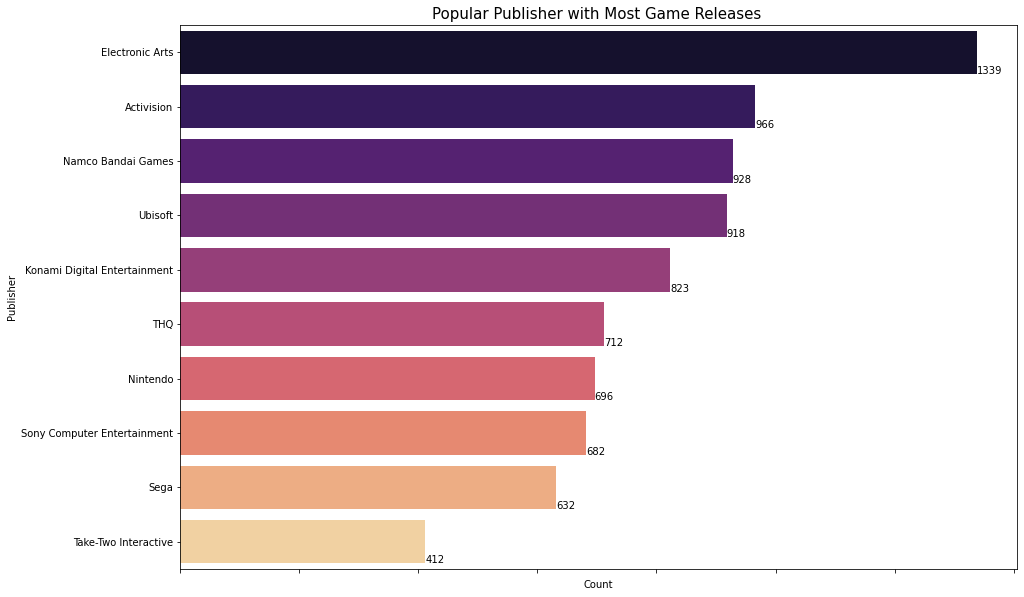

In [26]:
pop_publisher = vg['Publisher'].value_counts().head(10).reset_index()
pop_publisher.rename(columns = {'index' : 'Publisher', 'Publisher':'Count'}, inplace = True)

plt.figure(figsize = (15,10))
pop_publ_fig = sns.barplot(x = 'Count', y = 'Publisher', data = pop_publisher, palette = 'magma')
pop_publ_fig.set_xticklabels(pop_publ_fig.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
pop_publ_fig.set_title('Popular Publisher with Most Game Releases ', fontsize = 15)

show_values_on_bars(pop_publ_fig, 'h', 0)

plt.show()

> Although Nintendo has the highest global sales, it seems that Electronic Arts hold the most games within the list.

# 9 Highest Selling Genre in 2006 - 2010

In [27]:
yearly_sales = vg.groupby(by = ['Year'])['Global_Sales'].sum().reset_index()
yearly_sales.sort_values(by = 'Global_Sales', ascending = False).head()

,Year,Global_Sales
28,2008,678.90
29,2009,667.59
27,2007,609.92
30,2010,600.29
26,2006,521.04


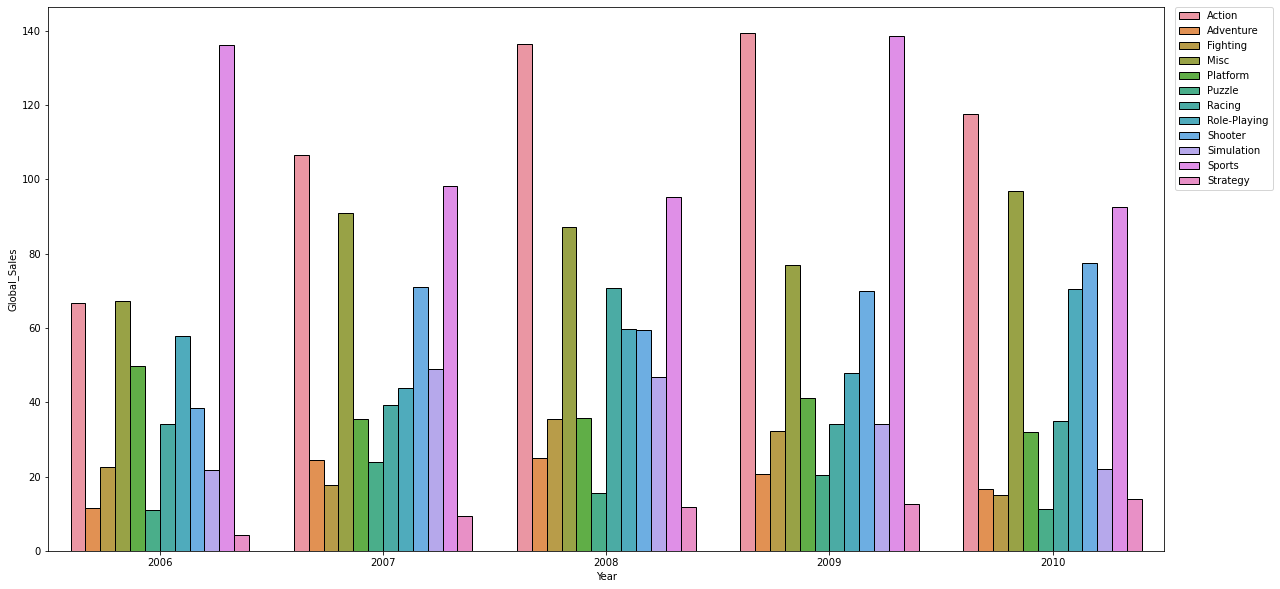

In [28]:
filter_1 = vg['Year'] > 2005
filter_2 = vg['Year'] < 2011
vg_1 = vg[filter_1 & filter_2]

vg__x = vg_1.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(20,10))
plattt = sns.barplot(x = vg__x['Year'], y = vg__x['Global_Sales'], hue = vg__x['Genre'], data = vg__x, 
            ci = 0, edgecolor = 'black')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

> During 2006 - 2010, which are the top 5 high selling period, the dominating genre throughout the years also are Action and Sports.

# 10 Annual Top Selling Platform

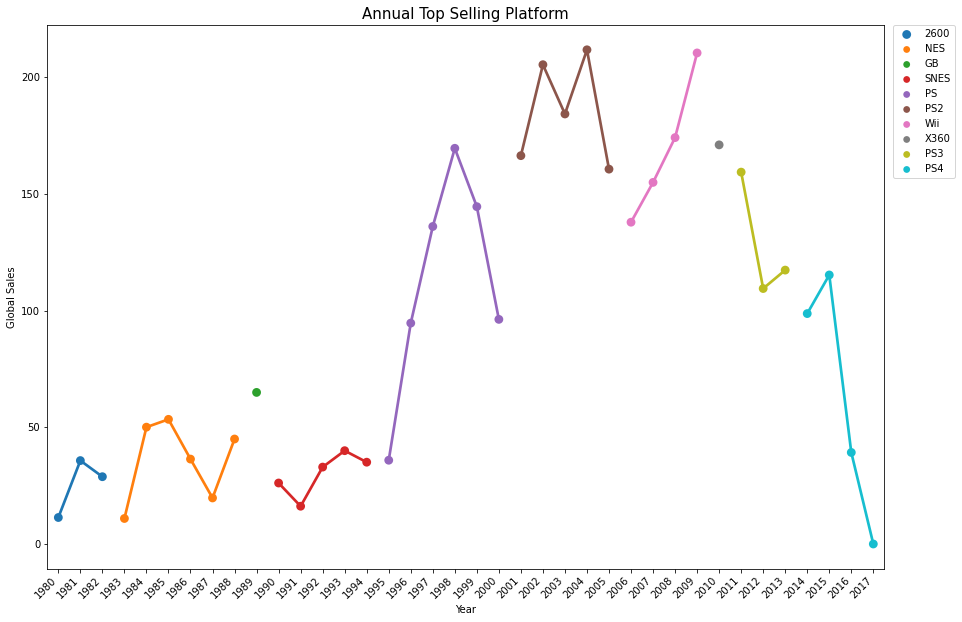

<Figure size 432x288 with 0 Axes>

In [29]:
platform_year = vg.pivot_table('Global_Sales', index = 'Platform', columns = 'Year', aggfunc = 'sum')
platform_idx = platform_year.idxmax()
platform_max = platform_year.max()

df_platformyear = pd.concat([platform_idx, platform_max], axis = 1).reset_index()
df_platformyear.rename(columns = {0 : 'Platform', 1:'Global Sales'}, inplace = True)


plt.figure(figsize = (15,10))

platform_year_plot = sns.pointplot(x = 'Year',y = 'Global Sales', hue = 'Platform',
                              data = df_platformyear)
platform_year_plot.set_title('Annual Top Selling Platform', fontsize = 15)
platform_year_plot.set_xticklabels(platform_year_plot.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.show()



fig = platform_year_plot.get_figure()
plt.savefig('annual_top_platform.png') 

> It really safe to say that the newer platform is the best selling one.

# 11 Annual Top Selling Genre

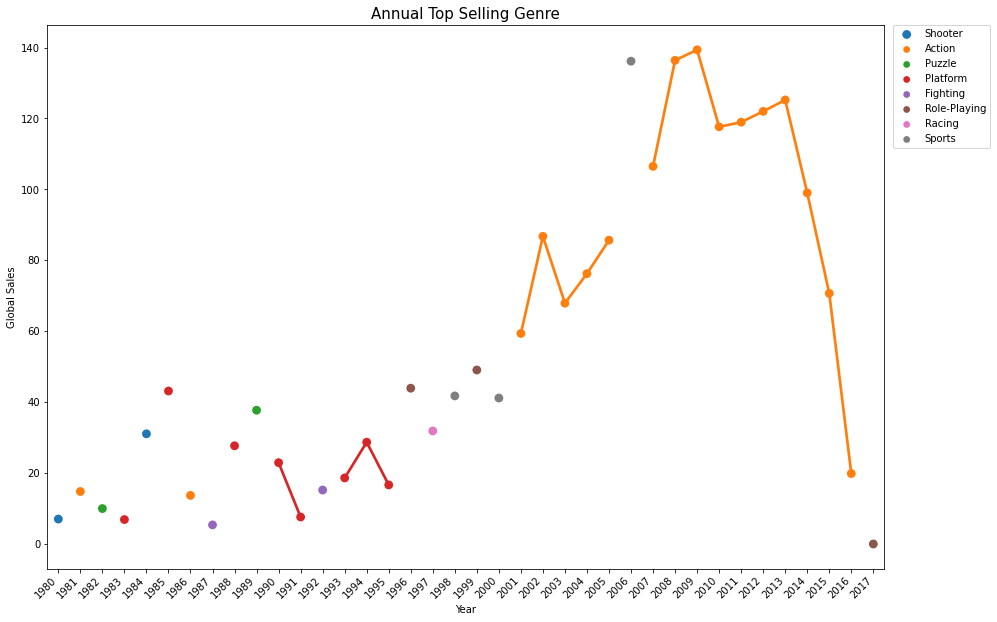

In [30]:
genre_year = vg.pivot_table('Global_Sales', index = 'Genre', columns = 'Year', aggfunc = 'sum')
genre_idx = genre_year.idxmax()
genre_max = genre_year.max()

df_genreyear = pd.concat([genre_idx, genre_max], axis = 1).reset_index()
df_genreyear.rename(columns = {0 : 'Genre', 1:'Global Sales'}, inplace = True)


plt.figure(figsize = (15,10))

genre_year_plot = sns.pointplot(x = 'Year',y = 'Global Sales', hue = 'Genre',
                              data = df_genreyear)
genre_year_plot.set_title('Annual Top Selling Genre', fontsize = 15)
genre_year_plot.set_xticklabels(genre_year_plot.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


plt.show()

> Action genre reached its peak sales at $140 Million in 2009 and the most well sold games.

# 12 Annual Top Selling Publisher

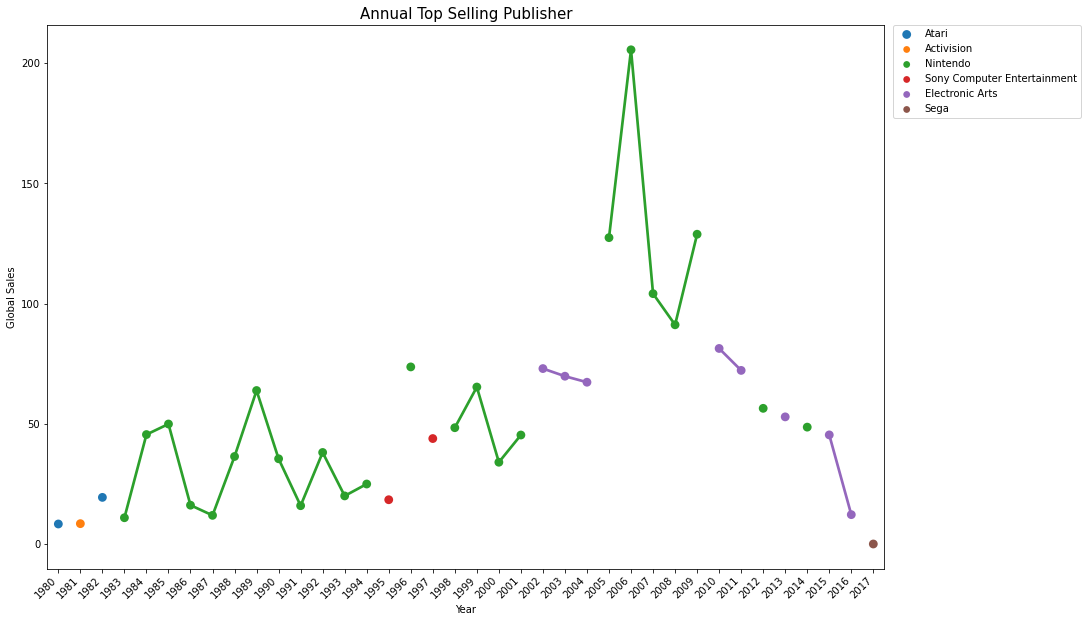

In [31]:
pub_year = vg.pivot_table('Global_Sales', index = 'Publisher', columns = 'Year', aggfunc = 'sum')
pub_idx = pub_year.idxmax()
pub_max = pub_year.max()

df_pubyear = pd.concat([pub_idx, pub_max], axis = 1).reset_index()
df_pubyear.rename(columns = {0 : 'Publisher', 1:'Global Sales'}, inplace = True)


plt.figure(figsize = (15,10))

pub_year_plot = sns.pointplot(x = 'Year',y = 'Global Sales', hue = 'Publisher',
                              data = df_pubyear)
pub_year_plot.set_title('Annual Top Selling Publisher', fontsize = 15)
pub_year_plot.set_xticklabels(pub_year_plot.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


plt.show()

> For most years, Nintendo was the top selling publisher and reached the peak in 2006.

# 13 Annual Top Selling Game

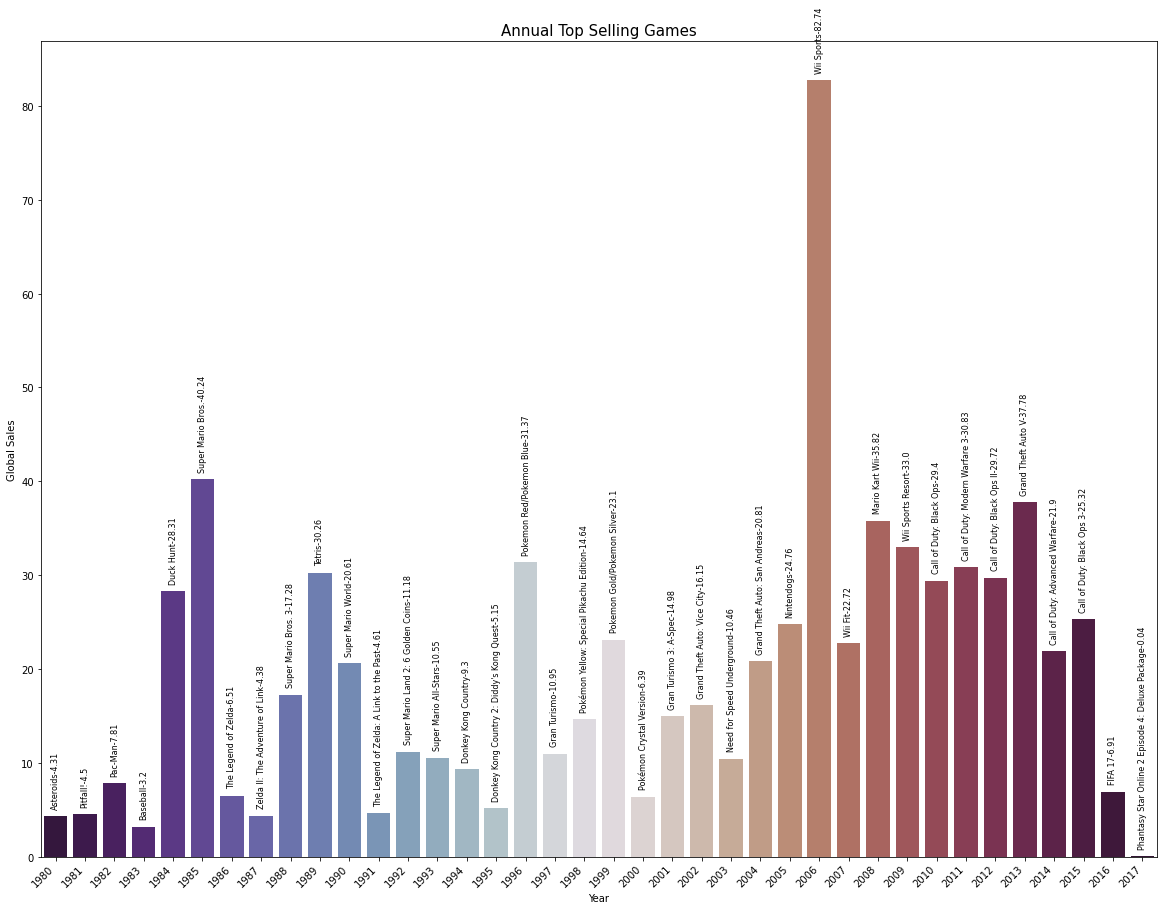

In [32]:
indiv_year = vg.pivot_table('Global_Sales', index = 'Name', columns = 'Year', aggfunc = 'sum')
indiv_idx = indiv_year.idxmax()
indiv_max = indiv_year.max()

df_indivyear = pd.concat([indiv_idx, indiv_max], axis = 1).reset_index()
df_indivyear.rename(columns = {0 : 'Name', 1:'Global Sales'}, inplace = True)
name = df_indivyear['Name']

plt.figure(figsize = (20,15))

indiv_year_plot = sns.barplot(x = 'Year', y = 'Global Sales', data = df_indivyear, palette = 'twilight_shifted')
indiv_year_plot.set_title('Annual Top Selling Games', fontsize = 15)
indiv_year_plot.set_xticklabels(indiv_year_plot.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
index = 0
for value in df_indivyear['Global Sales']:
    indiv_year_plot.text(index, value + 1, 
                         str(name[index] + '-' + str(round(value, 2))), 
                         color = 'black', size = 8, rotation = 90, ha = "center")
    index += 1

plt.show()

# 14 Pie Chart Sales by Region

In [33]:
print('NA Sales :',vg['NA_Sales'].sum())
print('JP Sales :',vg['JP_Sales'].sum())
print('EU Sales :',vg['EU_Sales'].sum())
print('Other Sales :',vg['Other_Sales'].sum())
print('Global Sales :',vg['Global_Sales'].sum())

NA Sales : 4327.650000000001
JP Sales : 1284.2700000000002
EU Sales : 2406.69
Other Sales : 788.9100000000001
Global Sales : 8811.97


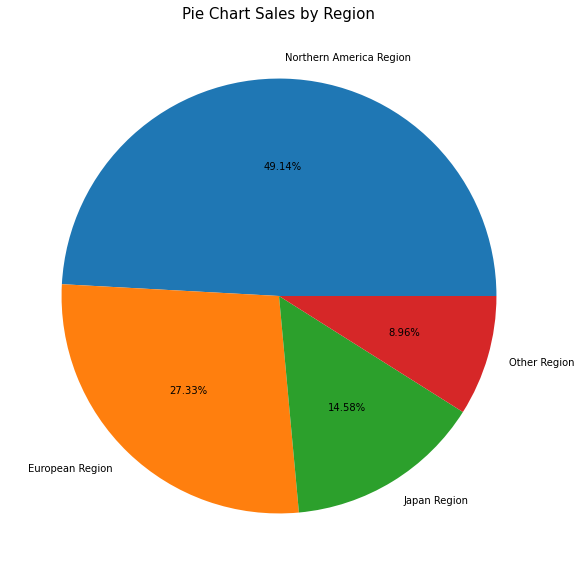

In [34]:
list_region = ['Northern America Region', 'European Region', 'Japan Region', 'Other Region']
list_sales = [vg['NA_Sales'].sum(), vg['EU_Sales'].sum(), vg['JP_Sales'].sum(), vg['Other_Sales'].sum()]
region_sales = pd.Series(list_sales, list_region, name = 'Region Sales')
labels_1 = list(region_sales.index)

plt.figure(figsize=(15,10))

plt.pie(region_sales, labels = labels_1, autopct='%1.2f%%')
plt.title('Pie Chart Sales by Region', fontsize = 15)
plt.show()

# 15 Correlation Heatmap

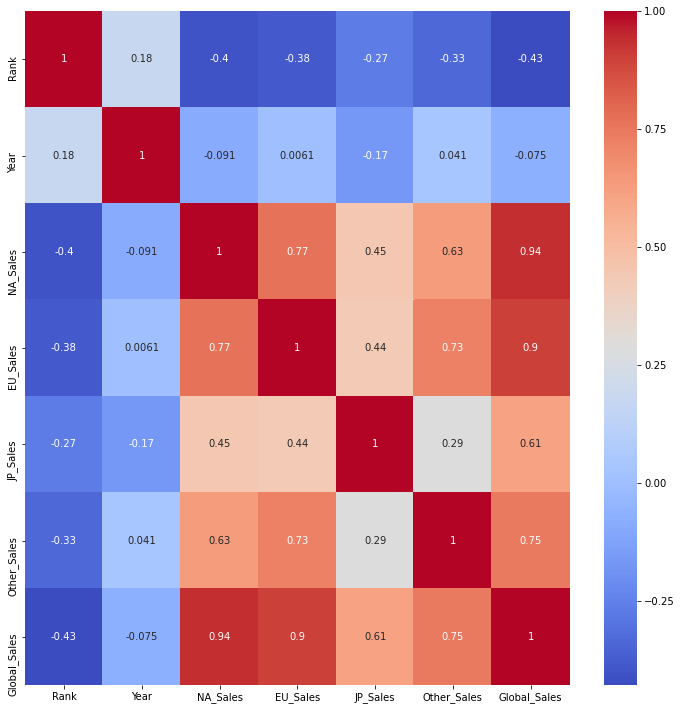

In [35]:
plt.figure (figsize = (10,10))
corr = sns.heatmap(vg.corr(),cmap = 'coolwarm', annot = True)
plt.tight_layout()
plt.show()

> Global_Sales is highly correlated to NA_Sales and EU_Sales.

# Conclusion

- Top selling Platform is PS2, X360, and PS3.
- 2008 is a great year for the gaming industry.
- Japan has an exquisite taste in gaming, as its best selling gaming Genre is Role-Playing.
- Nintendo and Electronic Arts have done some really good job in publishing games.
- Wii Sports is the highest selling game all time in 2006.
- For the next generation platform such as PS4, my suggestion for top publisher to make a bestselling game is to make an Action Genre game and try to target the Northern America Region as it is the biggest market.

_______________________

# 16 Stripplot Genre - Global Sales

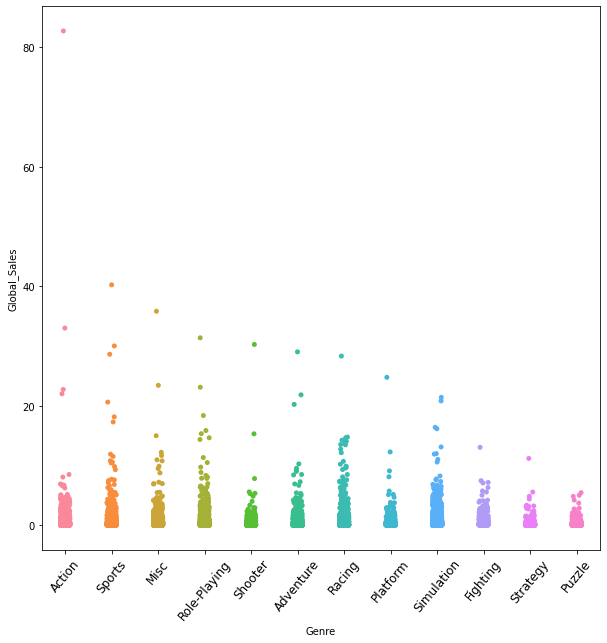

In [36]:
plt.figure(figsize = (10,10))

ax = sns.stripplot(data=vg, x = 'Genre', y = 'Global_Sales')
ax.set_xticklabels(labels = vg['Genre'].value_counts().index, fontsize=12, rotation=50)
plt.show()

# 17 Pairplot

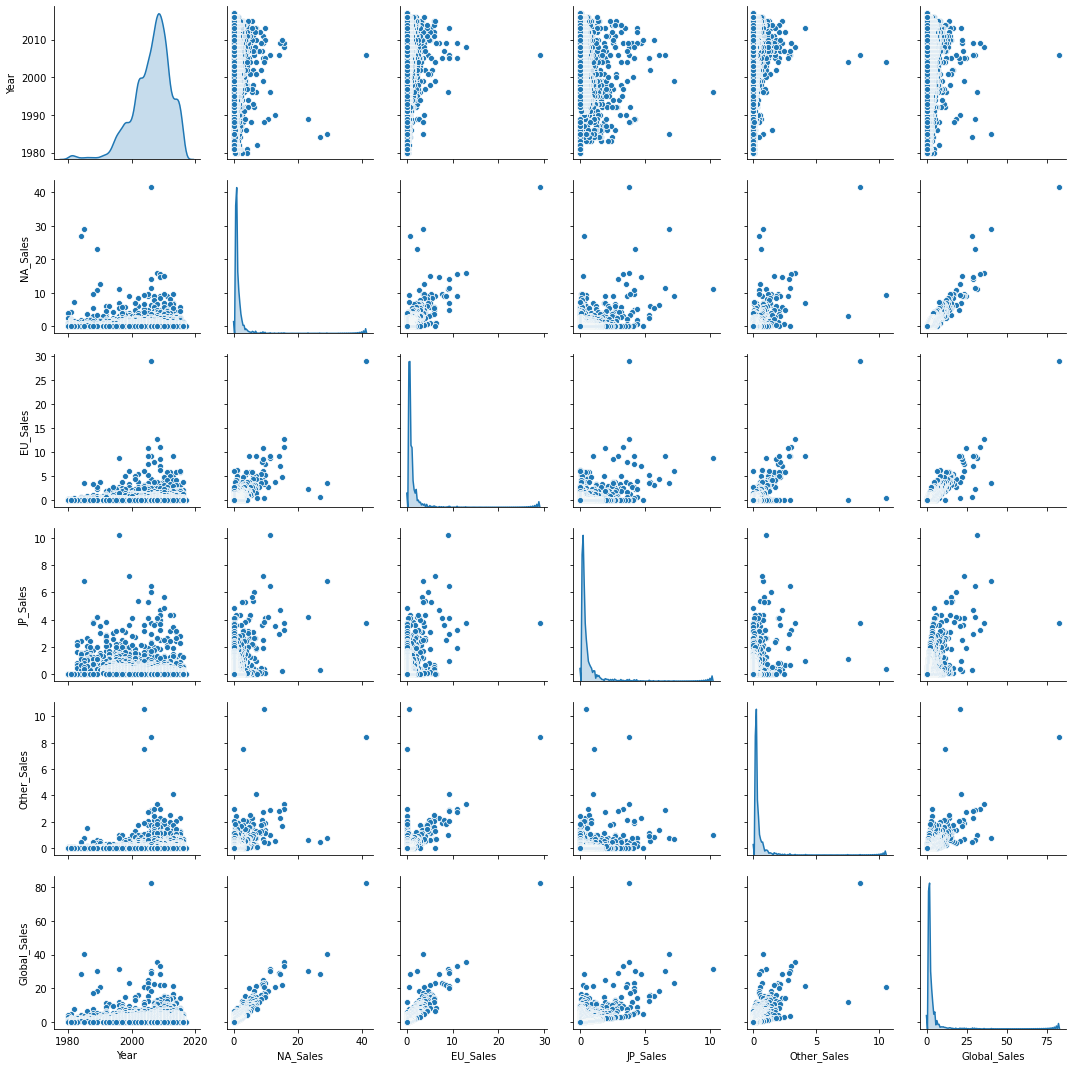

In [37]:
sns.pairplot(vg.drop(['Rank', 'Name'], axis = 1), diag_kind = 'kde', palette = 'magma')
plt.show()

# 18 Pairgrid

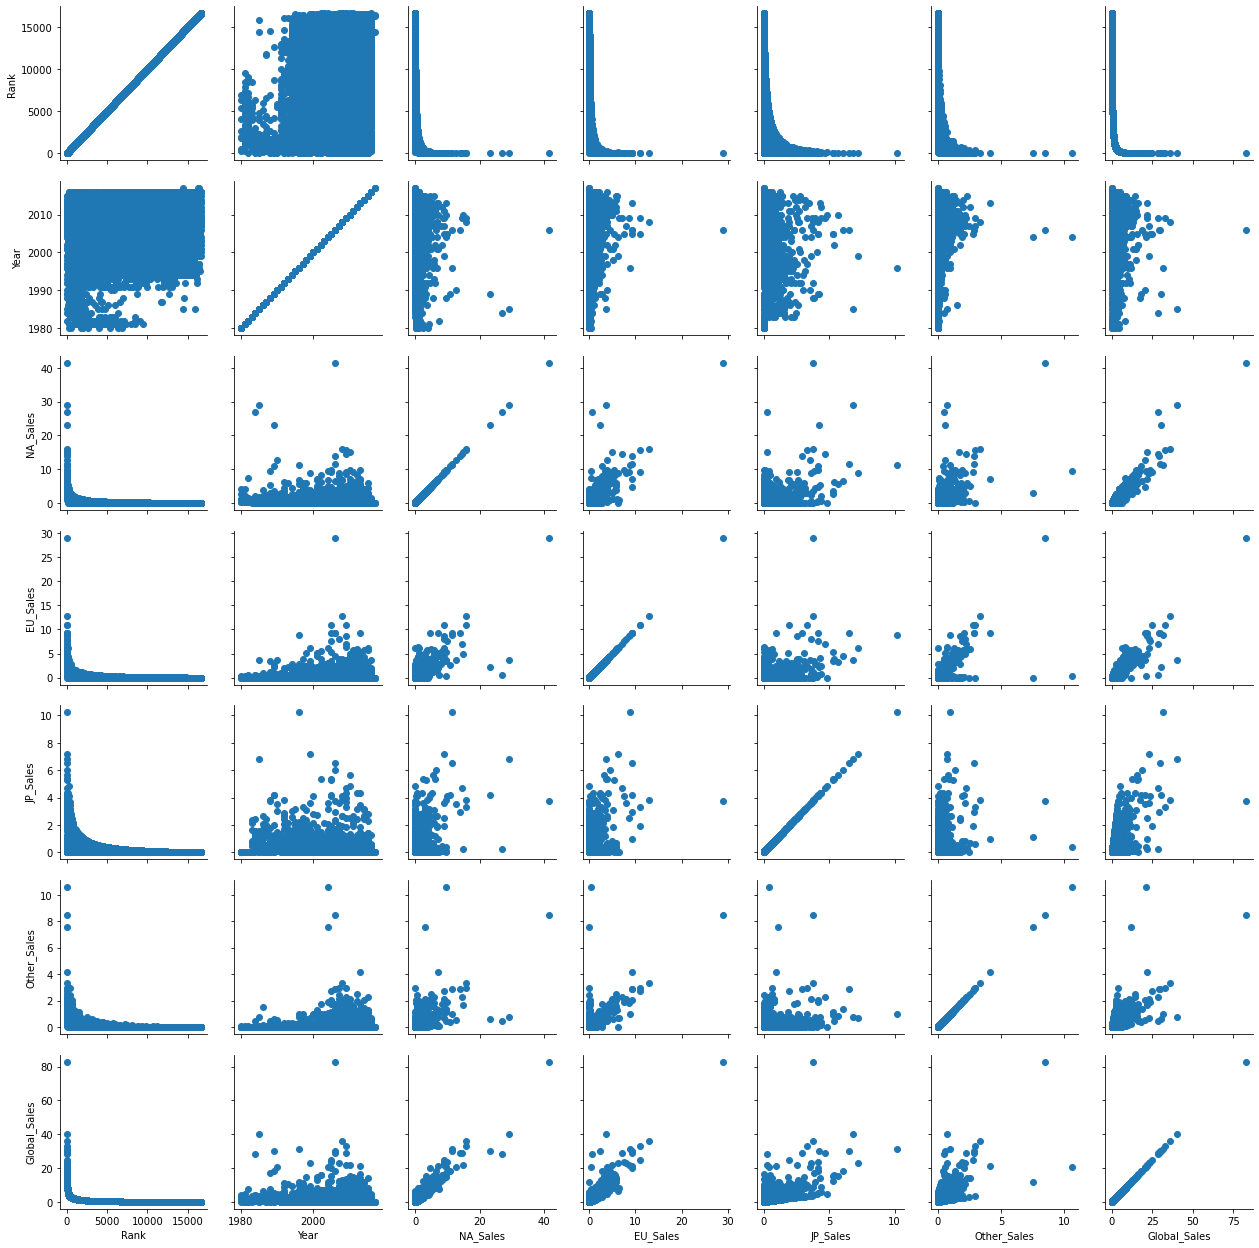

In [38]:
sns.PairGrid(vg).map(plt.scatter)
plt.show()

credit : 
<a href="https://www.kaggle.com/snanilim/video-games-sales-analysis-and-visualization#11.-Sales-compearison-by-platform">This Kaggle</a> and <a href="https://www.kaggle.com/neilslab/seaborn-visualization/notebook">This Kaggle</a>